## 8주차: 파이썬으로 경제 분석하기 (종합 응용 및 마무리)

**강의 개요:**

여러분, 드디어 8주간의 파이썬 여정 마지막 주차입니다! 그동안 정말 수고 많으셨습니다. 우리는 파이썬의 기초 문법부터 시작해서 변수, 자료형, 리스트와 딕셔너리 같은 데이터 구조, 조건문과 반복문을 이용한 제어 흐름, 함수를 통한 코드 재사용, 그리고 Matplotlib을 이용한 기본적인 데이터 시각화까지 숨 가쁘게 달려왔습니다.

이번 마지막 8주차에는 새로운 내용을 배우기보다는, 우리가 **지난 7주간 배운 모든 파이썬 기술들을 종합적으로 활용**하여 간단한 **경제 분석 케이스 스터디**를 진행해보려고 합니다. 가상의 국가 데이터를 가지고 GDP, 1인당 GDP, 경제 성장률, 물가 상승률 등을 계산하고, 국가 간 비교 분석을 수행하며, 그 결과를 시각화하는 전체 과정을 경험해 볼 것입니다.

이를 통해 여러분은 파이썬이 실제 경제 데이터를 분석하고 인사이트를 도출하는 데 얼마나 유용한 도구인지 다시 한번 체감하고, 앞으로 파이썬을 활용한 경제 분석 능력을 키워나가는 데 자신감을 얻을 수 있을 것입니다.

**이번 시간 학습 목표:**

1.  지난 7주간 배운 파이썬 핵심 개념(변수, 자료형, 리스트/딕셔너리, 조건문, 반복문, 함수, 기본 시각화)을 복습하고 통합적으로 이해합니다.
2.  주어진 간단한 거시경제 데이터를 파이썬 리스트를 사용하여 저장하고 관리할 수 있습니다.
3.  함수와 반복문을 활용하여 주요 경제 지표(1인당 GDP, GDP 성장률 등)를 계산할 수 있습니다.
4.  조건문을 활용하여 계산된 지표를 바탕으로 국가 간 비교 분석을 수행하고 결과를 해석할 수 있습니다.
5.  Matplotlib을 사용하여 분석 결과를 효과적으로 시각화(선 그래프, 막대 그래프 등)하고 의미를 설명할 수 있습니다.
6.  파이썬을 활용한 경제/데이터 분석의 다음 학습 단계를 인지하고 지속적인 학습 동기를 얻습니다.

---

## 1. 종합 분석 시작: 시나리오 및 데이터 준비

**시나리오:**

우리는 3개 가상 국가(국가 A, 국가 B, 국가 C)의 최근 4년간 주요 거시경제 지표 데이터를 확보했습니다. 이 데이터를 바탕으로 각 국가의 경제 성과를 비교 분석하고 시각화하여 간단한 보고를 하려고 합니다.

**분석 대상 지표:**

* 연도 (Year)
* 명목 GDP (Nominal GDP, 단위: 십억 달러)
* 인구 (Population, 단위: 백만 명)
* 물가 상승률 (Inflation Rate, 단위: %)

**데이터:**

(실제 분석에서는 보통 CSV 파일 등 외부 데이터를 읽어오지만, 이번 시간에는 배운 내용을 복습하기 위해 파이썬 리스트에 직접 데이터를 입력하여 사용합니다.)

In [1]:
# --- 데이터 준비 ---

# 연도 리스트
years = [2021, 2022, 2023, 2024]

# 국가 A 데이터
country_A = "국가 A"
gdp_A = [500, 520, 545, 570] # 단위: 십억 달러
pop_A = [50, 51, 52, 53]     # 단위: 백만 명
inf_A = [2.5, 3.1, 2.8, 2.2]     # 단위: %

# 국가 B 데이터
country_B = "국가 B"
gdp_B = [1200, 1250, 1310, 1380] # 단위: 십억 달러
pop_B = [80, 81, 82, 83]      # 단위: 백만 명
inf_B = [1.5, 2.2, 1.9, 1.7]      # 단위: %

# 국가 C 데이터
country_C = "국가 C"
gdp_C = [80, 85, 92, 88]     # 단위: 십억 달러 (성장 정체/후퇴 가정)
pop_C = [20, 20.5, 21, 21.2]   # 단위: 백만 명
inf_C = [4.5, 5.5, 4.8, 6.0]     # 단위: % (높은 물가 상승률 가정)

# 데이터 확인 (선택 사항)
print("연도:", years)
print(f"{country_A} GDP:", gdp_A)
print(f"{country_B} 인구:", pop_B)
print(f"{country_C} 물가상승률:", inf_C)

연도: [2021, 2022, 2023, 2024]
국가 A GDP: [500, 520, 545, 570]
국가 B 인구: [80, 81, 82, 83]
국가 C 물가상승률: [4.5, 5.5, 4.8, 6.0]


---

## 2. 데이터 탐색 및 주요 지표 계산

이제 준비된 데이터를 바탕으로 주요 경제 지표들을 계산해 봅시다. 계산 로직을 함수로 만들어 재사용성을 높이는 것이 좋습니다.

**필요 함수 정의:**

In [2]:
def calculate_gdp_per_capita(total_gdp_billion, population_million):
  """총 GDP(십억 달러)와 인구(백만 명)를 받아 1인당 GDP(달러)를 계산합니다."""
  if population_million <= 0:
    return None
  # (십억 달러 * 10억) / (백만 명 * 1백만) = (십억 / 백만) * 달러 / 명 = 1000 * 달러 / 명
  # 또는 (total_gdp_billion * 1,000,000,000) / (population_million * 1,000,000)
  gdp_pc = (total_gdp_billion * 1000) / population_million
  return gdp_pc

def calculate_gdp_growth_rate(gdp_prev, gdp_curr):
  """이전 연도 GDP와 현재 연도 GDP를 받아 연간 GDP 성장률(%)을 계산합니다."""
  if gdp_prev <= 0: # 이전 GDP가 0 이하면 성장률 계산 불가 (또는 매우 큼)
      return None
  growth_rate = ((gdp_curr - gdp_prev) / gdp_prev) * 100
  return growth_rate

**지표 계산 (반복문 활용):**

In [3]:
# 각 국가별 연도별 1인당 GDP 계산
gdp_pc_A = []
for i in range(len(years)): # len(years)는 4, i는 0, 1, 2, 3
    gdp_pc = calculate_gdp_per_capita(gdp_A[i], pop_A[i])
    gdp_pc_A.append(gdp_pc)

gdp_pc_B = []
for i in range(len(years)):
    gdp_pc = calculate_gdp_per_capita(gdp_B[i], pop_B[i])
    gdp_pc_B.append(gdp_pc)

gdp_pc_C = []
for i in range(len(years)):
    gdp_pc = calculate_gdp_per_capita(gdp_C[i], pop_C[i])
    gdp_pc_C.append(gdp_pc)

print("--- 연도별 1인당 GDP (달러) ---")
print(f"{country_A}: {[f'{pc:.0f}' for pc in gdp_pc_A]}") # 리스트 컴프리헨션으로 보기 좋게 출력
print(f"{country_B}: {[f'{pc:.0f}' for pc in gdp_pc_B]}")
print(f"{country_C}: {[f'{pc:.0f}' for pc in gdp_pc_C]}")


# 각 국가별 연간 GDP 성장률 계산 및 평균 계산
gdp_growth_A = []
for i in range(1, len(years)): # 1, 2, 3 (두 번째 해부터 시작)
    growth = calculate_gdp_growth_rate(gdp_A[i-1], gdp_A[i])
    gdp_growth_A.append(growth)
avg_growth_A = sum(gdp_growth_A) / len(gdp_growth_A) if gdp_growth_A else 0

gdp_growth_B = []
for i in range(1, len(years)):
    growth = calculate_gdp_growth_rate(gdp_B[i-1], gdp_B[i])
    gdp_growth_B.append(growth)
avg_growth_B = sum(gdp_growth_B) / len(gdp_growth_B) if gdp_growth_B else 0

gdp_growth_C = []
for i in range(1, len(years)):
    growth = calculate_gdp_growth_rate(gdp_C[i-1], gdp_C[i])
    gdp_growth_C.append(growth)
avg_growth_C = sum(gdp_growth_C) / len(gdp_growth_C) if gdp_growth_C else 0


print("\n--- 연간 GDP 성장률 (%) ---")
print(f"{country_A}: {[f'{g:.2f}' for g in gdp_growth_A]}")
print(f"{country_B}: {[f'{g:.2f}' for g in gdp_growth_B]}")
print(f"{country_C}: {[f'{g:.2f}' for g in gdp_growth_C]}") # 2024년에 마이너스 성장 포함

print("\n--- 기간 내 평균 GDP 성장률 (%) ---")
print(f"{country_A}: {avg_growth_A:.2f}%")
print(f"{country_B}: {avg_growth_B:.2f}%")
print(f"{country_C}: {avg_growth_C:.2f}%")


# 물가 안정 목표 초과 연도 카운트 (예: 목표치 2.0%)
inflation_target = 2.0
high_inflation_years_A = 0
for rate in inf_A:
    if rate > inflation_target:
        high_inflation_years_A += 1

high_inflation_years_B = 0
for rate in inf_B:
    if rate > inflation_target:
        high_inflation_years_B += 1

high_inflation_years_C = 0
for rate in inf_C:
    if rate > inflation_target:
        high_inflation_years_C += 1

print(f"\n--- 물가 안정 목표({inflation_target}%) 초과 연도 수 ---")
print(f"{country_A}: {high_inflation_years_A} 년")
print(f"{country_B}: {high_inflation_years_B} 년")
print(f"{country_C}: {high_inflation_years_C} 년")

--- 연도별 1인당 GDP (달러) ---
국가 A: ['10000', '10196', '10481', '10755']
국가 B: ['15000', '15432', '15976', '16627']
국가 C: ['4000', '4146', '4381', '4151']

--- 연간 GDP 성장률 (%) ---
국가 A: ['4.00', '4.81', '4.59']
국가 B: ['4.17', '4.80', '5.34']
국가 C: ['6.25', '8.24', '-4.35']

--- 기간 내 평균 GDP 성장률 (%) ---
국가 A: 4.46%
국가 B: 4.77%
국가 C: 3.38%

--- 물가 안정 목표(2.0%) 초과 연도 수 ---
국가 A: 4 년
국가 B: 1 년
국가 C: 4 년


---

## 3. 국가 간 비교 분석 (조건문 활용)

계산된 지표들을 바탕으로 국가 간 경제 성과를 비교해 봅시다.

In [4]:
print("\n--- 국가 간 비교 분석 ---")

# 1. 평균 GDP 성장률 비교
print("\n[평균 GDP 성장률 비교]")
if avg_growth_A > avg_growth_B and avg_growth_A > avg_growth_C:
    print(f"{country_A}가 평균 성장률이 가장 높습니다 ({avg_growth_A:.2f}%).")
elif avg_growth_B > avg_growth_A and avg_growth_B > avg_growth_C:
    print(f"{country_B}가 평균 성장률이 가장 높습니다 ({avg_growth_B:.2f}%).")
elif avg_growth_C > avg_growth_A and avg_growth_C > avg_growth_B:
     print(f"{country_C}가 평균 성장률이 가장 높습니다 ({avg_growth_C:.2f}%).")
else:
    # 두 국가 이상이 동일하게 가장 높거나, 데이터 부족 등 예외 처리
    print("평균 성장률이 가장 높은 국가를 특정하기 어렵거나 여러 국가가 동일합니다.")
    # 좀 더 정교하게 하려면 max 값을 찾고, 해당 값을 가진 모든 국가를 찾는 로직 필요

# 2. 최근 연도(2024년) 1인당 GDP 비교 (gdp_pc_ 리스트의 마지막 값 사용)
print("\n[2024년 1인당 GDP 비교]")
gdp_pc_last_A = gdp_pc_A[-1] # 리스트의 마지막 요소
gdp_pc_last_B = gdp_pc_B[-1]
gdp_pc_last_C = gdp_pc_C[-1]

# 간단 비교 예시 (A와 B만 비교)
if gdp_pc_last_A > gdp_pc_last_B:
    print(f"2024년 1인당 GDP는 {country_A}(${gdp_pc_last_A:.0f})가 {country_B}(${gdp_pc_last_B:.0f})보다 높습니다.")
else:
    print(f"2024년 1인당 GDP는 {country_B}(${gdp_pc_last_B:.0f})가 {country_A}(${gdp_pc_last_A:.0f})보다 높거나 같습니다.")
# (3개국 비교 로직은 더 복잡해짐)

# 3. 물가 안정성 비교
print("\n[물가 안정성 비교 (목표 초과 연도 수 기준)]")
if high_inflation_years_C > high_inflation_years_A and high_inflation_years_C > high_inflation_years_B:
    print(f"{country_C}가 물가 불안정 기간이 가장 길었습니다 ({high_inflation_years_C}년).")
elif high_inflation_years_B > high_inflation_years_A and high_inflation_years_B > high_inflation_years_C:
     print(f"{country_B}가 물가 불안정 기간이 가장 길었습니다 ({high_inflation_years_B}년).")
elif high_inflation_years_A > high_inflation_years_B and high_inflation_years_A > high_inflation_years_C:
     print(f"{country_A}가 물가 불안정 기간이 가장 길었습니다 ({high_inflation_years_A}년).")
else:
     print("물가 불안정 기간이 가장 긴 국가를 특정하기 어렵거나 여러 국가가 동일합니다.")

# 간단 요약
print("\n[종합 의견 (예시)]")
print(f"- {country_B}는 꾸준한 성장과 비교적 안정적인 물가를 보였습니다.")
print(f"- {country_A}는 양호한 성장을 보였으나, 물가 관리에 다소 어려움이 있었습니다.")
print(f"- {country_C}는 성장 정체와 높은 물가 상승률을 동시에 겪는 어려움이 있었습니다.")


--- 국가 간 비교 분석 ---

[평균 GDP 성장률 비교]
국가 B가 평균 성장률이 가장 높습니다 (4.77%).

[2024년 1인당 GDP 비교]
2024년 1인당 GDP는 국가 B($16627)가 국가 A($10755)보다 높거나 같습니다.

[물가 안정성 비교 (목표 초과 연도 수 기준)]
물가 불안정 기간이 가장 긴 국가를 특정하기 어렵거나 여러 국가가 동일합니다.

[종합 의견 (예시)]
- 국가 B는 꾸준한 성장과 비교적 안정적인 물가를 보였습니다.
- 국가 A는 양호한 성장을 보였으나, 물가 관리에 다소 어려움이 있었습니다.
- 국가 C는 성장 정체와 높은 물가 상승률을 동시에 겪는 어려움이 있었습니다.


---

## 4. 분석 결과 시각화 (Matplotlib 활용)

계산하고 분석한 결과를 그래프로 시각화하여 추세와 비교를 더 명확하게 전달해 봅시다.

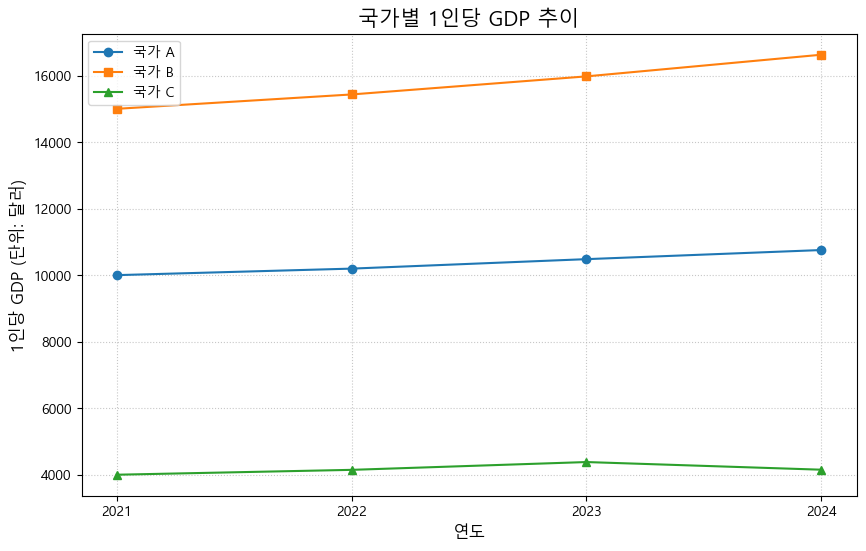

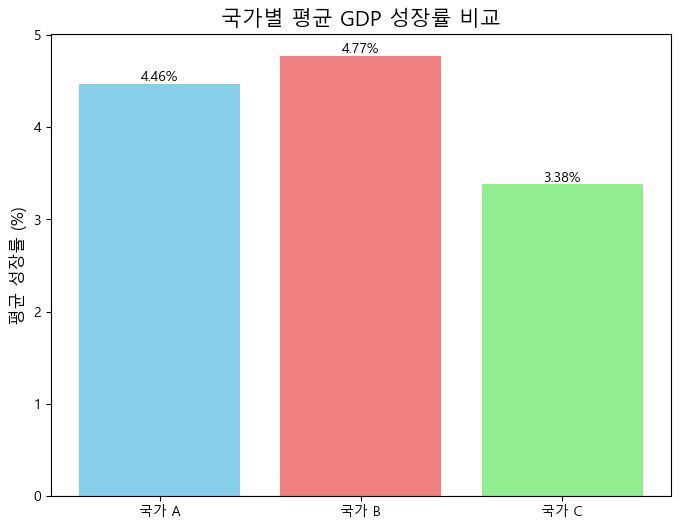

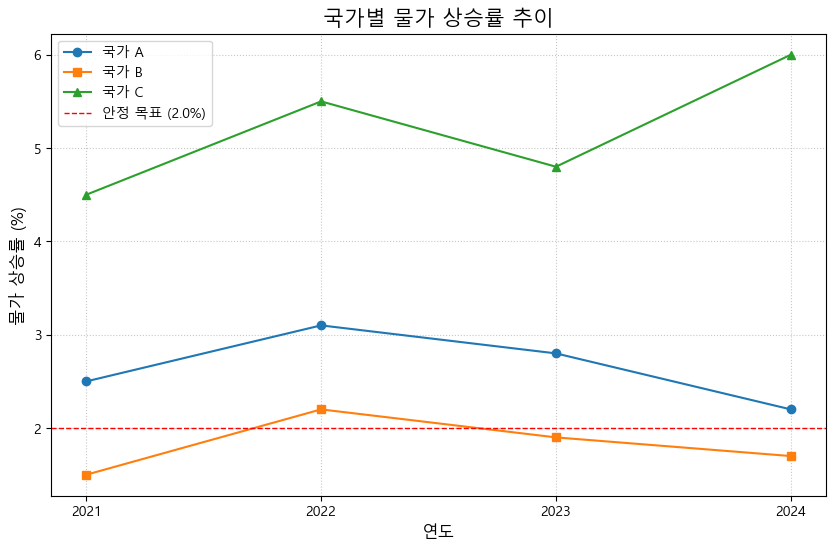

In [5]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정 (이전 셀들에서 실행/설정되었다고 가정)
try:
    if platform.system() == 'Linux': plt.rc('font', family='NanumBarunGothic')
    elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
    elif platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
except NameError: pass
except FileNotFoundError: print("한글 폰트를 찾을 수 없습니다.")
plt.rcParams['axes.unicode_minus'] = False


# --- 시각화 1: 국가별 1인당 GDP 추이 (선 그래프) ---
plt.figure(figsize=(10, 6))

plt.plot(years, gdp_pc_A, marker='o', label=country_A)
plt.plot(years, gdp_pc_B, marker='s', label=country_B)
plt.plot(years, gdp_pc_C, marker='^', label=country_C)

plt.title('국가별 1인당 GDP 추이', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('1인당 GDP (단위: 달러)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(years) # 연도 눈금 표시

plt.show()


# --- 시각화 2: 국가별 평균 GDP 성장률 비교 (막대 그래프) ---
countries = [country_A, country_B, country_C]
avg_growths = [avg_growth_A, avg_growth_B, avg_growth_C]

plt.figure(figsize=(8, 6))
bars = plt.bar(countries, avg_growths, color=['skyblue', 'lightcoral', 'lightgreen'])
# 막대 위에 값 표시 (선택 사항)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom' if yval >=0 else 'top', ha='center')


plt.title('국가별 평균 GDP 성장률 비교', fontsize=15)
plt.ylabel('평균 성장률 (%)', fontsize=12)
# plt.xlabel('국가') # x축 레이블은 국가 이름으로 충분하면 생략 가능
plt.axhline(0, color='grey', linewidth=0.8) # 성장률 0 기준선 추가

plt.show()

# --- 시각화 3: 국가별 물가 상승률 추이 (선 그래프) ---
plt.figure(figsize=(10, 6))

plt.plot(years, inf_A, marker='o', label=country_A)
plt.plot(years, inf_B, marker='s', label=country_B)
plt.plot(years, inf_C, marker='^', label=country_C)
# 물가 안정 목표선 추가
plt.axhline(inflation_target, color='red', linestyle='--', linewidth=1, label=f'안정 목표 ({inflation_target}%)')

plt.title('국가별 물가 상승률 추이', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('물가 상승률 (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(years)

plt.show()

SyntaxError: invalid decimal literal (2921276771.py, line 1)

시각화 결과를 통해 우리는 각 국가의 1인당 GDP가 어떻게 변화했는지, 평균 성장률은 어느 국가가 높았는지, 물가 안정 목표는 잘 관리되었는지 등을 한눈에 파악할 수 있습니다. 예를 들어, 국가 B는 1인당 GDP가 가장 높고 꾸준히 증가하며 평균 성장률도 양호하고 물가도 안정적인 반면, 국가 C는 1인당 GDP 증가가 미미하고 평균 성장률이 낮으며 물가 상승률이 높은 어려움을 겪고 있음을 그래프를 통해 쉽게 알 수 있습니다.

---

## 5. 과정 마무리 및 앞으로의 학습 방향

여러분, 8주간의 '경제학도를 위한 파이썬 기초' 수업에 참여하시느라 정말 수고 많으셨습니다! 오늘 우리는 지난 7주간 배운 파이썬의 핵심 요소들 – 변수, 자료형, 리스트, 딕셔너리, 조건문, 반복문, 함수, 그리고 기초적인 시각화 – 을 모두 활용하여 간단하지만 의미 있는 경제 데이터 분석 케이스 스터디를 수행했습니다.

이 과정을 통해 여러분은 다음과 같은 파이썬의 힘을 경험하셨기를 바랍니다.

* **데이터의 구조화:** 리스트와 딕셔너리를 이용해 여러 데이터를 체계적으로 관리할 수 있습니다.
* **계산 자동화:** 함수와 반복문을 이용해 복잡하거나 반복적인 계산(1인당 GDP, 성장률 등)을 효율적으로 수행할 수 있습니다.
* **논리적 분석:** 조건문을 이용해 데이터에 기반한 판단(국가 간 비교, 목표 달성 여부 등)을 내릴 수 있습니다.
* **효과적인 시각화:** Matplotlib을 이용해 분석 결과를 명확하고 직관적인 그래프로 표현하여 인사이트를 얻고 소통할 수 있습니다.

**이 수업은 끝났지만, 여러분의 파이썬 여정은 이제 시작입니다!**

오늘 우리가 다룬 내용은 파이썬의 방대한 능력 중 아주 일부에 불과합니다. 경제/금융 데이터 분석 분야에서 파이썬을 더욱 강력하게 활용하기 위해 다음과 같은 주제들을 앞으로 더 학습해 보시기를 적극 추천합니다.

1.  **Pandas 라이브러리:** 파이썬 데이터 분석의 **핵심**입니다. 엑셀의 스프레드시트와 유사한 형태(DataFrame)로 데이터를 다루며, 데이터 로딩(CSV, Excel 파일 등), 정제, 필터링, 그룹화, 집계 등 훨씬 강력하고 편리한 데이터 처리 기능을 제공합니다. **(가장 먼저 학습 추천!)**
2.  **NumPy 라이브러리:** 고성능 **수치 계산**에 특화된 라이브러리입니다. 다차원 배열(행렬 등) 연산을 매우 빠르게 처리하며, Pandas를 비롯한 다른 과학 계산 라이브러리의 기반이 됩니다. 계량경제학이나 통계 모델링에 필수적입니다.
3.  **Matplotlib 심화 및 Seaborn:** 오늘 배운 Matplotlib의 더 다양한 그래프 종류와 고급 꾸미기 옵션을 익히고, Matplotlib 기반으로 더 아름답고 통계적인 그래프를 쉽게 그릴 수 있게 해주는 Seaborn 라이브러리를 배우면 시각화 능력이 크게 향상됩니다.
4.  **Statsmodels / Scikit-learn:** 통계 분석 및 **계량경제 모델링**(회귀분석, 시계열 분석 등)을 위한 Statsmodels, **머신러닝** 모델 구축 및 평가를 위한 Scikit-learn 등 전문적인 분석 라이브러리들을 학습하면 실제 연구나 실무에 파이썬을 적용할 수 있습니다.

이러한 도구들을 익히고, 실제 경제 데이터(한국은행 ECOS, 통계청 KOSIS, World Bank Data 등)를 가져와 직접 분석하고 시각화하는 **개인적인 프로젝트**를 진행해 보는 것이 최고의 학습 방법입니다. Kaggle과 같은 데이터 분석 플랫폼에서 다른 사람들의 코드를 보고 배우는 것도 좋습니다.

다시 한번 8주간 열정적으로 참여해주신 여러분께 감사드리며, 파이썬이라는 강력한 도구를 통해 경제학적 통찰력을 더욱 키워나가시기를 응원하겠습니다! 궁금한 점이 있다면 언제든지 질문해주세요.

---

## (선택) 여덟 번째 주차 과제

그동안 배운 내용을 최종적으로 점검하고 응용력을 키우기 위한 선택적 과제입니다.

1.  **케이스 스터디 확장:**
    * 오늘 진행한 케이스 스터디에서 사용된 3개 국가 데이터에 대해, **평균 물가 상승률**을 계산하고 비교하는 분석을 추가해보세요.
    * 1인당 GDP와 평균 GDP 성장률을 각각 x축과 y축으로 하는 **산점도**를 그려서, 국가들이 어떤 그룹(예: 고성장-고소득, 저성장-고소득 등)에 위치하는지 시각적으로 표현해보세요.
2.  **개인 프로젝트 아이디어 구상:**
    * 여러분이 관심 있는 경제/금융/사회 현상(예: 특정 산업 동향, 환율 변동 요인, 부동산 가격 변화, 주식 시장 분석 등)을 하나 선정하고, 이 현상을 분석하기 위해 어떤 데이터가 필요하며 파이썬(지금까지 배운 내용 또는 앞으로 배울 내용 포함)을 어떻게 활용할 수 있을지 간단한 **분석 계획**을 세워보세요. (예: 어떤 데이터를 수집 -> 어떤 지표 계산 -> 어떤 조건으로 분석 -> 어떤 그래프로 시각화)

*(이번 주차는 과제 제출보다는, 자율적으로 복습하고 응용해보는 것을 권장합니다.)*
